### Image Processing - Classifications Based on the MNIST Dataset
This project explores supervised machine learning using Random Forest algorithm to build a classification model based on the MNIST dataset.

In [1]:
# import relevant libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

%matplotlib inline

### Section 1 - Preliminary Data Exploration & Pre-Processing

The MNIST dataset is a well-known dataset of images (pixel values) of handwritten digits, first publisehd by LeCun et al. (http://yann.lecun.com/exdb/mnist/). In this particular instance, the data set has been downloaded from https://www.kaggle.com/datasets/oddrationale/mnist-in-csv & it has been divided into a training set ('mnist-train.csv) & a test set ('mnist-test.csv'). Therefore, we will first examine these 2 files.

In [2]:
# First, we check the shape of the training and test datasets.

mnist_train = pd.read_csv('mnist_train.csv')
mnist_test = pd.read_csv('mnist_test.csv')

print(f'The shape of the training set is: {mnist_train.shape}')
print(f'The shape of the test set is: {mnist_test.shape}')

The shape of the training set is: (60000, 785)
The shape of the test set is: (10000, 785)


The shape of the training & test sets is consistent with the description by LeCun et al. ("The MNIST database of handwritten digits ... has a training set of 60,000 examples, and a test set of 10,000 examples"). There seems to be 785 columns, so we will look at the columns next.

In [3]:
# check the first 10 rows of the training data set.
mnist_train.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The first column contains the label & the rest of the 784 columns contain the pixel intensity values at various positions within an image. This is because each digit image is made up of 28 x 28 pixels (28 x 28 = 784).
</br> To gain a better understanding of how these pixel intensity values constitute images of hand-written  numbers, the first 10 entries from the training set are visualised below.

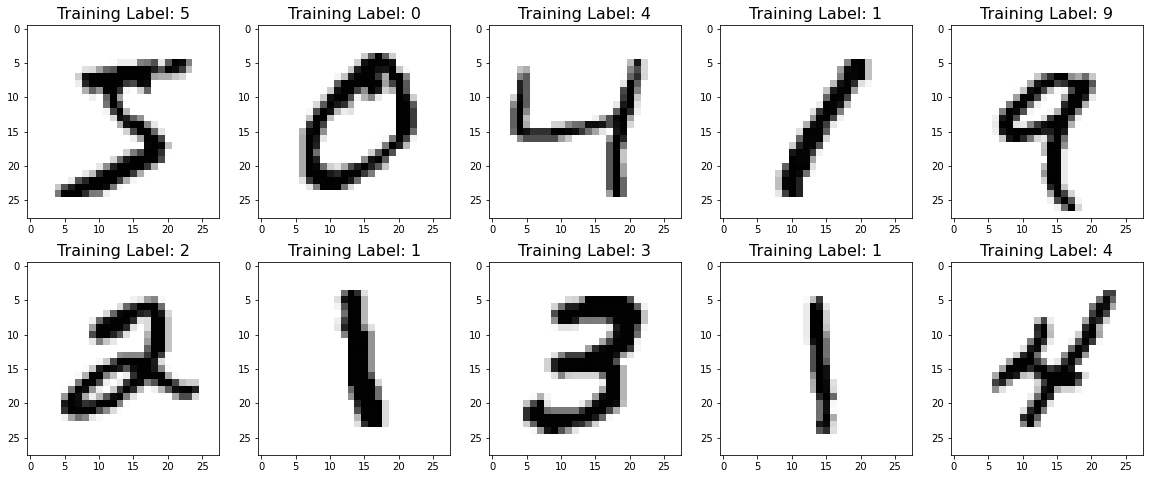

In [4]:
# selected the first 10 entries from the training data set for preliminary visualisation.

x_plot = mnist_train.iloc[0:10:,1:].values.reshape(10, 784)
y_plot = mnist_train.iloc[0:10:,0].values

plt.figure(figsize=(20,8))
for index, (image, label) in enumerate(zip(x_plot, y_plot)):
    ax = plt.subplot(2, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.binary)
    plt.title(f'Training Label: {label}', fontsize = 16)

The figure above shows how the pixel intensity values make up images of hand-written numbers for the first 10  entries in the training set. It is interesting to note, for example, that there are two distinct forms of the number 4.
</br> Now, since we will want to divided the entire data set into training, development & training sets (in Section 2), the current training & test sets are first merged below.

In [5]:
# Concatenate the training & test datasets since we're going to divide everything into 3 sets: training, development & test sets later.

mnist_merged = pd.concat([mnist_train, mnist_test])
mnist_merged

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist_merged.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,4.452429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,2.890195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


The merged data set now contains 70,000 entries & is now ready for further processing. Another thing to notice is that the pixel intensity values range from 0 to 254 and, therefore, require scaling so that there are no pixel intensity values from certain regions within an image that may dominate the predictions.

### Section 2 - Splitting the Data into Training, Development & Test Sets

Next, the merged dataset will be divided into trainig, development & test sets.

In [7]:
x = mnist_merged.iloc[:,1:].values # pixel intensity
x = StandardScaler().fit_transform(x)  # the pixel intensity values are scaled

y = mnist_merged.iloc[:,0].values # the labels

x = x.reshape(-1,784)
y = y.reshape(-1,1)

In [8]:
# set value for random state
r = 8

# Set aside 20% of training set for test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle = True, random_state = r)

# Use the same function above and set aside another 20% from the training set for the development set
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.25, random_state= r) # 0.25 x 0.8 = 0.2

# The split now is 60% (x_train), 20% (x_test), 20% (x_dev)
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"x_dev shape: {x_dev.shape}")
print(f"y_dev shape: {y_dev.shape}")

x_train shape: (42000, 784)
y_train shape: (42000, 1)
x_test shape: (14000, 784)
y_test shape: (14000, 1)
x_dev shape: (14000, 784)
y_dev shape: (14000, 1)


The training, development, and test sets have now been defined.
- Training set: a subset of the entire dataset that is used to train the model. In this case, 60% of the data (42,000 entries) will be used to build a decision tree classifier.
- Development set: a subset of the dataset that has been excluded from training & is used to see whether the model seems to be generalising well to data that is not in the training set. In other words, it is used for parameter optimisation / tuning of a model that has been trained on the training set. This helps us to spot under- or overfitting early on. Here, 20% of the data (14,000 entries) will be used for development.
- Test set: a subset of the dataset that has been excluded from training & is used to test the optimised model and give an unbiased estimate of the accuracy of the final tuned model. Here, 20% of the data (14,000 entries) has been held back for later testing.

### Section 3 - Training & Optimisation of a Random Forest Classifier

In this section, a random forest classifier will be trained on the training set & a couple of the parameters will be tuned on the development set. But first, a base decision tree model (without tuning/pruning) is trained so that we can benchmark the Decision Tree classifier against the base decision tree model.

In [9]:
# Evaluation of a base decision tree model without pruning (for comparison purpose)

BaseDcsnTree = DecisionTreeClassifier(max_depth=None, random_state=r)
BaseDcsnTree.fit(x_train, y_train)
print(f'Performance of base decision tree: {BaseDcsnTree.score(x_dev, y_dev)}')
print(f'at a maximum depth of: {BaseDcsnTree.tree_.max_depth}')

Performance of base decision tree: 0.8570714285714286
at a maximum depth of: 40


The base decision tree model without pruning produced a score of 0.857 at a maximum depth (max_depth) of 40. Next, a Random Forest classifier is trained below. Without any prior knowledge, a max_depth of 10 is used initially since the optimal max_depth that can prevent over-fitting is likely to be < 40 (we know from the base decision tree model that 40 is a depth where all the leaves are pure).

In [10]:
# Evaluation of an initial Random Forest classifier

y_train = y_train.ravel()

RndmFrst = RandomForestClassifier(max_depth=10, random_state=r)
RndmFrst.fit(x_train,y_train)
RndmFrst.score(x_dev, y_dev)
print(f'Performance of random forest classifier: {RndmFrst.score(x_dev, y_dev)}')
print(f'at a maximum depth of: {RndmFrst.max_depth}')

Performance of random forest classifier: 0.9435
at a maximum depth of: 10


The initial Random Forest classifier with max_depth = 10 produced a score of 0.944, an improvement over the base decision tree model. To determine if the classifier can further be improved, we will evaluate different values for the parameters max_depth & n_estimators. According to scikit-learn, n_estimators is defined as 'The number of trees in the forest'. In other words, n_estimators define how many decision trees are built for the final 'voting' for the final best tree classifier.
</br>
</br> The default n_estimators is 100 (this was used in building the initial Random Forest classifier). Therefore, the accuracy scores of various Random Forest classifiers with n_estimators between 10 and 120 (inclusive) are calculated & plotted below. For efficiency, the scores are only calculated at every increment of 10 in n_estimators, and max_depth is kept at 10 for now (note: on my machine, the code below took 3 min to run).

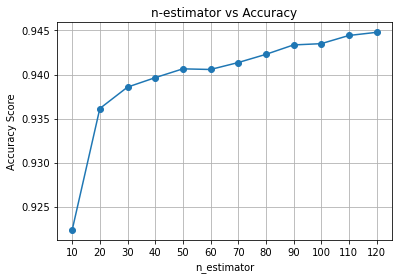

In [13]:
# n-estimators parameter tuning

n_estimator_no = np.arange(10, 121, 10).tolist()
rf_score_n = []

for n in n_estimator_no:
    RndmFrst = RandomForestClassifier(n_estimators=n, max_depth=10, random_state=r)
    RndmFrst.fit(x_train,y_train)
    rf_score = RndmFrst.score(x_dev, y_dev)
    rf_score_n.append(rf_score)

fig = plt.figure()
plt.plot(n_estimator_no, rf_score_n, marker='o')
plt.ylabel("Accuracy Score")
plt.xlabel("n_estimator")
plt.title('n-estimator vs Accuracy')
plt.xticks(n_estimator_no)
plt.grid()
plt.show()

From the plot above, we can see that the score greatly improves from n_estimators of 10 to 20. After that, incremental improvements are observed all the way to n_estimators = 120, where a maximum score of just below 0.45 was reached.

</br> Next, we will re-evaluate max_depth using the optimised n_estimators of 120. Similar to the above, the accuracy scores of various Random Forest classifiers with n_estimators between 10 and 50 (inclusive) are calculated & plotted below at every increment of 5 in max_depth (note: on my machine, the code below took almost 6 min to run).

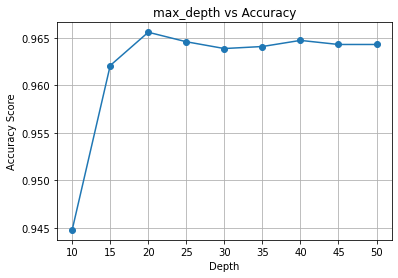

In [14]:
# max_depth parameter tuning

max_depth_no = np.arange(10, 51, 5).tolist()
rf_score_n = []

for m in max_depth_no:
    Randomforest = RandomForestClassifier(n_estimators=120, max_depth=m, random_state=r)
    Randomforest.fit(x_train,y_train)
    rf_score = Randomforest.score(x_dev, y_dev)
    rf_score_n.append(rf_score)

fig, ax = plt.subplots()
ax.plot(max_depth_no, rf_score_n, marker='o')
plt.ylabel("Accuracy Score")
plt.xlabel("Depth")
plt.title('max_depth vs Accuracy')
plt.xticks(max_depth_no)
plt.grid()
plt.show()

Interestingly, although significant improvements were observed going from max_depth of 10 to 20, the score actually started to decline beyond 20 & remain steady at just below 0.965, at least up to a depth of 50. Therefore, 20 is chosen as the optimum max_depth value.

### Section 4 - Fitting the Random Forest Classifier on the Test Set

Now that the Random Forest classifier has been optimised with n_estimators of 120 & max_depth of 20, it will be tested on the test set below.

In [17]:
# Optimised Random Forest model
y_test = y_test.ravel()

Randomforest1 = RandomForestClassifier(n_estimators=120, max_depth=20, random_state=r)
Randomforest1.fit(x_test,y_test)

print(f'The accuracy of a random forest classifier with the optimised n-estimators & max_depth numbers is: {Randomforest1.score(x_test, y_test)}')

The accuracy of a random forest classifier with the optimised n-estimators & max_depth numbers is: 0.9999285714285714


The optimised Random Forest classifier produced a score of 0.9999, which means that practically almost all entries in the test set were predicted correctly. To better visualise the accuracy of the predictions, a confusion matrix is generated below. In addition, the precision, recall & F1 scores of the prediction are also calculated.

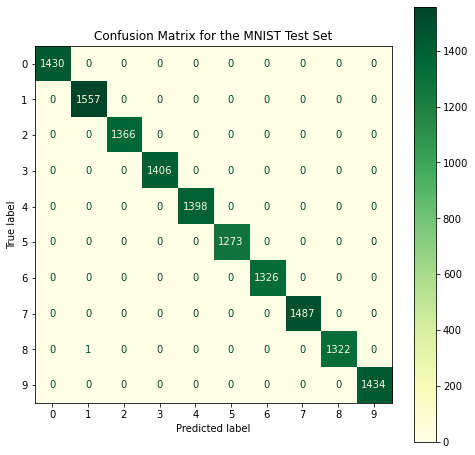

In [18]:
# make predictions on test data
y_pred = Randomforest1.predict(x_test).reshape(-1,1)

conf_mtx = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
classes = np.arange(0, 10, 1).tolist()
fig, ax = plt.subplots(figsize=(8,8))
display = ConfusionMatrixDisplay(conf_mtx, display_labels=classes)
ax.set(title='Confusion Matrix for the MNIST Test Set')
display.plot(ax=ax, cmap='YlGn')
plt.show()

In [19]:
# average f1 score
av_f1 = f1_score(y_test, y_pred, average='micro')
print(av_f1)

# f1 score per class
f = f1_score(y_test, y_pred, average=None)
lowest_score = min(f)
hardest_class = classes[list(f).index(lowest_score)]

print('Hardest class to classify is the number:', hardest_class)

0.9999285714285714
Hardest class to classify is the number: 8


In [20]:
# precision and recall for '8'  
prec = precision_score(y_test == classes.index(8), y_pred == classes.index(8))
rec = recall_score(y_test == classes.index(8), y_pred == classes.index(8))

print('The Precision score for number 8 is:', prec)
print('The Recall score for number 8 is:', rec)

The Precision score for number 8 is: 1.0
The Recall score for number 8 is: 0.999244142101285


From the confusion matrix above, we can see that there is only 1 entry that was classified into a wrong category: it is an 8 that was incorrectly predicted as a 1. With an average F1 score of 0.9999, precision score of 1.0, and a recall score of 0.9992, the remarkably accurate predictions of the tuned Random Forest classifier is perhaps not unexpected considering that the images in the MNIST dataset have been pre-processed (centered, processed into greyscale images & normalised to fit into 28 x 28 grids). According to LeCun et al., the dataset is "... a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting" (http://yann.lecun.com/exdb/mnist/).